<a href="https://colab.research.google.com/github/nhajat/Chatbot_101/blob/main/Chatbot_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Chatbots 101

##1. EchoBot 

In [ ]:
bot_template = "BOT : {0}"
user_template = "USER : {0}"

# Định nghĩa hàm để phản hồi tin nhắn của người dùng
def respond(message):
    bot_message = "I can hear you! You said: " + message
    return bot_message

# Định nghĩa một hàm gửi tin nhắn đến bot:
def send_message(message):
    print(user_template.format(message))
    r = respond(message)
    print(bot_template.format(r))

In [ ]:
send_message("hello!")

USER : hello!
BOT : I can hear you! You said: hello!


##2. Tạo tính cách 

### Cuộc trò chuyện nhỏ


In [ ]:
responses ={
"what's your name?": "my name is EchoBot",
"what's the weather today?": "it's sunny!"
}

def respond(message):
   if message in responses:
      return responses [message]

respond("what's your name?")

'my name is EchoBot'

### Thêm các câu nói đa dạng


In [ ]:
responses ={ 
"what's today's weather?": "it's {} today"
}

weather_today = "cloudy"

def respond(message):
   if message in responses:
      return responses[message].format(weather_today)

respond("what's today's weather?")

"it's cloudy today"

###Chọn phản hồi

In [ ]:
responses ={
   "what's your name?": [
      "my name is EchoBot",
      "they call me EchoBot",
      "the name's Bot, Echo Bot"
  ]
}

import random
def respond(message):
   if message in responses:
      return random.choice(responses[message])

respond("what's your name?")

'my name is EchoBot'

###Đặt câu hỏi

In [ ]:
responses = [ "tell me more!", "why do you think that?" ]
import random
def respond(message):
   return random.choice(responses)

respond("I think you're really great")

'tell me more!'

###Chitchat

In [ ]:
# Định nghĩa biến
name = "Greg"
weather = "cloudy"

# Tạo một từ điển để xác định trước các phản hồi
responses = {
  "what's your name?": "my name is {0}".format(name),
  "what's today's weather?": "the weather is {0}".format(weather),
  "default": "default message"
}

# Trả lại phản hồi phù hợp nếu có trong từ điển, nếu không có thì trả về tin nhắn mặc định được truy cập qua key "default"
def respond(message):
    # Kiểm tra xem tin nhắn có trong câu trả lời đã định nghĩa responses hay không
    if message in responses:
        # Trả lại tin nhắn phù hợp
        bot_message = responses[message]
    else:
        # Trả lại thông báo "default"
        bot_message = responses["default"]
    return bot_message

### Thêm sự đa dạng cho bot

In [ ]:
# Import the random module
import random

name = "Greg"
weather = "cloudy"

# Định nghĩa một từ điển chứa danh sách các câu trả lời cho mỗi tin nhắn
responses = {
  "what's your name?": [
      "my name is {0}".format(name),
      "they call me {0}".format(name),
      "I go by {0}".format(name)
   ],
  "what's today's weather?": [
      "the weather is {0}".format(weather),
      "it's {0} today".format(weather)
    ],
  "default": ["default message"]
}

# Sử dụng random.choice() để chọn một phản hồi phù hợp
def respond(message):
    # Kiểm tra xem tin nhắn có trong câu trả lời đã định nghĩa responses hay không
    if message in responses:
        # Trả lại một phản hồi ngẫu nhiên
        bot_message = random.choice(responses[message])
    else:
        # Trả lại một phản hồi "default" ngẫu nhiên
        bot_message = random.choice(responses["default"])
    return bot_message

###ELIZA I: Tạo bot đơn giản

In [ ]:
import random
# Từ điển có sẵn
response = {  
    "question" : ["yes","good, thanks"],
    "statement" : ["not oke", "not okee"]
}

def respond(message):
  if message.endswith("?"):
    return random.choice(response["question"])
  else:
    return random.choice(response["statement"])

respond("are you oke?")

'good, thanks'

##3. Xử lý văn bản với biểu thức chính quy


**Biểu thức chính quy sử dụng cho ELIZA**

Phần lớn sự kỳ diệu của hệ thống ELIZA phụ thuộc vào việc đưa ra ấn tượng rằng chatbot đã hiểu người dùng nói, mặc dù tính logic đằng sau cực kỳ đơn giản. 

Ví dụ, chúng ta hỏi ELIZA "Do you remember when you ate strawberries in the garden?", chatbot sẽ trả lời: "How could I forget when I ate strawberries in the garden?". Một phần làm cho ví dụ này trở nên hấp dẫn là chủ đề của nó. Chúng ta sẽ hỏi về ký ức liên kết với tâm trí và khả năng tự ý thức về bản thân. Ký ức về việc ăn dâu tây trong vườn gợi lên những cảm xúc mạnh mẽ. Nhưng nếu chúng ta chọn cách phản hồi được tạo, chúng ta thấy rằng nó thực sự khá đơn giản.

####**So sánh và tìm kiếm trùng khớp giữa các mẫu**

In [ ]:
import re
# Dấu . là ký tự đặc biệt và so sánh với bất kỳ ký tự nào.
# Dấu * sẽ so sánh với 0 hoặc nhiều lần xuất hiện của một mẫu
# .* hiểu cơ bản là so sánh với bất kỳ chuỗi ký tự nào
pattern = "do you remember .*"
message = "do you remember when you ate strawberries in the garden"
# Kiểm tra xem một tin nhắn có trùng khớp với một mẫu hay không bằng cách gọi re.search().
match = re.search(pattern, message)

# if match: print("matches")
# else: print("not matches")

####**Trích xuất các cụm từ khóa**

In [ ]:
import re
# Việc thêm vào một dấu ngoặc đơn trong chuỗi ký tự mẫu sẽ xác định một tập hợp nhóm.
pattern = "if (.*)"
message = "what would happen if bots took over the world"
match = re.search(pattern, message)

In [ ]:
match.group(0)

'if bots took over the world'

In [ ]:
match.group(1)

'bots took over the world'

####**Chuyển đổi ngữ pháp**

Để làm cho câu trả lời mạch lạc về mặt ngữ pháp, chúng ta sẽ muốn chuyển đổi các cụm từ được trích xuất từ ngôi thứ nhất sang ngôi thứ hai và ngược lại. Trong tiếng Anh, sử dụng các chủ ngữ rất dễ dàng, và chỉ cần hoán đổi "I" và "you", "my" và "your" trong hầu hết các trường hợp. Chúng ta có thể sử dụng một phương thức khác của mô-đun re, `re.sub()`, để thực hiện thao tác chuyển đổi này.

In [ ]:
import re

def swap_pronouns(phrase):
   if 'I' in phrase:
      return re.sub('I', 'you', phrase)
   if 'my' in phrase:
      return re.sub('my', 'your', phrase)
   else:
      return phrase

swap_pronouns("I walk my dog")

'you walk my dog'

####**Kết hợp**

In [ ]:
pattern = 'do you remember (.*)'
message = 'do you remember when you ate strawberries in the garden'

In [ ]:
pattern = 'do you remember (.*)'
# message = 'do you remember when you ate strawberries in the garden'

message = input() 

def swap_pronouns(phrase):
   if 'you' in phrase:
      return re.sub('you', 'I', phrase)  
   else:
      return phrase

phrase = swap_pronouns(phrase)
responses = {
"do you remember (.*)": 'how could I forget {}'
}

def choose_response(message):
   if message in responses:
      return responses[message]

response = choose_response(pattern)
print(response.format(phrase))

do you remember when you ate strawberries in the garden
how could I forget when I ate strawberries in the garden


In [ ]:
phrase = re.search(pattern, message).group(1)
phrase

'when you ate strawberries in the garden'

In [ ]:
def swap_pronouns(phrase):
   if 'you' in phrase:
      return re.sub('you', 'I', phrase)
   if 'your' in phrase:
      return re.sub('your', 'my', phrase)
   else:
      return phrase

phrase = swap_pronouns(phrase)
phrase

'when I ate strawberries in the garden'

In [ ]:
responses = {
"do you remember (.*)": 'how could I forget {}'
}

def choose_response(message):
   if message in responses:
      return responses[message]

response = choose_response(pattern)
print(response)

how could I forget {}


In [ ]:
response.format(phrase)

'how could I forget when I ate strawberries in the garden'

#II. Understanding natural language

###Hiểu rõ về chủ ý và thực thể

NLU là một lĩnh vực con của xử lý ngôn ngữ tự nhiên, NLP, và thường quan tâm đến việc chuyển đổi văn bản thành dữ liệu có cấu trúc bên trong một ngôn ngữ cụ thể.

**Ví dụ**

Một chatbot đặt chỗ cho nhà hàng phải có thể hiểu được một câu nói như là:   
"I'm looking for a Mexican restaurant in the centre of town" và truy vấn vào cơ sở dữ liệu hoặc API để tìm kết quả phù hợp. Để làm điều này, chúng ta cần xác định mục đích của lời nói và trích xuất một tập hợp các thực thể có liên quan.

**Chủ ý**

Chủ ý là một từ ngữ mô tả về những gì một người đang cố gắng nói. Ví dụ như "hello", "hi" và "yoyoyo" là tất cả các cách mà mọi người có thể chào nhau. 

Câu ví dụ mà chúng ta vừa đề cập có thể được mô tả một cách hợp lý với chủ ý là tìm kiếm nhà hàng. Có nhiều cách khác nhau mà một người có thể diễn đạt chủ ý này, ví dụ như:

*   "I'm hungry"
*   "Show me good pizza spots"
*   "I want to take my boyfriend out for sushi".

Hiện tại, không có cách chính xác nào để gán chủ ý cho câu. Câu trả lời chính xác tùy thuộc vào cách sử dụng của người nói. Ví dụ, nếu bạn mở rộng khả năng của chatbot để nó thực sự có thể đặt bàn cho người dùng, câu cuối cùng "I want to take my boyfriend out for sushi" có thể được diễn đạt với chủ ý là yêu cầu đặt bàn thay vì chủ ý là tìm kiếm một nhà hàng.

**Thực thể**

Phần thứ hai của NLU là trích xuất thực thể từ văn bản. 

Trong ví dụ tìm kiếm nhà hàng, điều này có nghĩa là xác định chính xác ngày 10 tháng 6 là một ngày, sushi là một loại món ăn và địa điểm là thành phố new york. Một vấn đề được nghiên cứu kỹ lưỡng trong NLP là nhận dạng đối tượng được đặt tên, NER. Đây gần như chính xác là vấn đề mà chúng ta đang diễn đạt ở đây, với sự khác biệt là NER thường nhắm đến tìm các thực thể phổ quát như tên của người, tổ chức, ngày tháng,... 

Trong trường hợp của chatbot, chúng ta thường muốn định nghĩa hẹp hơn về các thực thể cụ thể đối với cách hiểu của mình.

**Sử dụng biểu thức chính quy để hiểu chủ ý**

Trong một vài bài tập tiếp theo, chúng ta sẽ xây dựng các biểu thức chính quy để nhận dạng các chủ ý và thực thể. Điều này đơn giản hơn nhiều so với các phương pháp học máy mà chúng ta sẽ sử dụng trong các phần sau của khóa học và có hiệu quả tính toán cao. Hạn chế chính là việc viết và gỡ lỗi cho các cụm từ thông dụng trở nên thực sự khó khăn khi chatbot có cấu trúc phức tạp hơn.

**Sử dụng biểu thức chính quy**

Chúng ta sẽ sử dụng biểu thức chính quy để tìm kiếm các từ khóa trong văn bản. Chúng ta có thể xây dựng các biểu thức tìm kiếm và so sánh trùng khớp với bất kỳ một trong số các từ khóa bằng cách sử dụng toán tử |, tương ứng với phép toán logic OR. Chúng ta có thể kiểm tra xem một chuỗi ký tự có trùng khớp với một mẫu hay không bằng cách kiểm tra xem đối tượng trùng khớp được trả về có phải là None hay không. Ví dụ, để tìm các từ khóa "hello", "hey", hoặc "hi", chúng ta có thể viết "hello|hey|hi".

In [ ]:
re.search(r"(hello|hey|hi)", "hey there!") is not None

Tuy nhiên, lưu ý rằng đây chỉ là một chuỗi ký tự, vì vậy, "hi" cũng sẽ trùng khớp với các từ "which", "this",...

In [ ]:
re.search(r"(hello|hey|hi)", "which one?") is not None

Chúng ta có thể thêm biểu thức ngăn cách từ "\b" ở đầu và cuối để cho biết rằng không được có bất kỳ ký tự chữ và số nào ở hai bên của từ khóa.

In [ ]:
re.search(r"\b(hello|hey|hi)\b", "hey there!") is not None

In [ ]:
re.search(r"\b(hello|hey|hi)\b", "which one?") is not None

**Lưu ý**

Chúng ta đã đặt một ký tự 'r' trước khi bắt đầu chuỗi ký tự. Biểu thức này sẽ tạo ra chuỗi ký tự thô, có nghĩa là chúng ta có thể thêm các ký tự đặc biệt như dấu gạch chéo ngược mà không xung đột với hành vi mặc định của chuỗi ký tự trong Python.

**Sử dụng biểu thức chính quy để nhận dạng thực thể**

Nếu chúng ta sử dụng một mẫu nhiều lần, chúng ta có thể tạo một đối tượng mẫu bằng phương thức re.compile().

In [ ]:
pattern = re.compile('[A-Z]{1}[a-z]*')

In [ ]:
message = """
Mary is a friend of mine,
she studied at Oxford and
now works at Google"""

pattern.findall(message)

Phương thức `findall()` của đối tượng mẫu sẽ trích xuất tất cả các chuỗi ký tự con trùng khớp một cách thuận tiện, để tìm tất cả các từ viết hoa trong một câu, chúng ta có thể thực thi phương thức `findall()` với đối số là một chuỗi ký tự.

###Phân loại "ý định" với regex I

In [ ]:
keywords = {
 'goodbye': ['bye', 'farewell'],
 'greet': ['hello', 'hi', 'hey'],
 'thankyou': ['thank', 'thx']
}

responses = {
 'goodbye': ['bye', 'farewell'],
 'greet': ['hello', 'hi', 'hey'],
 'thankyou': ['thank', 'thx']
}

# Định nghĩa từ điển patterns
patterns = {}

# Lặp các cặp giá trị của từ điển keywords
for intent, keys in keywords.items():
    # Tạo và biến dịch biểu thức chính quy sau đó lưu kết quả vào  patterns
    patterns[intent] = re.compile('|'.join(keys))
    
# In biến patterns
print(patterns)

###Phân loại "ý định" với regex I

In [ ]:
# Định nghĩa hàm match_intent để tìm "ý định" trong message
def match_intent(message):
    matched_intent = None
    for intent, pattern in patterns.items():
        # Kiểm tra nếu mẫu xuất hiện trong message
        if pattern.search(message):
            matched_intent = intent
    return matched_intent

# Định nghĩa hàm respond
def respond(message):
    # Gọi hàm match_intent function
    intent = match_intent(message)
    # Quay lại phản hồi mặc định
    key = "default"
    if intent in responses:
        key = intent
    return random.choice(responses[key])

# Gửi tin nhắn
send_message("hello!")
send_message("bye byeee")
send_message("thanks very much!")


###Trích xuất thực thể bằng regex


In [ ]:
def find_name(message):
  name = None
  name_keyword = re.compile('name|call')
  name_pattern = re.compile('[A-Z]{1}[a-z]*')
  if name_keyword.search(message):
    name_words = name_pattern.findall(message)
    if len(name_words) > 0:
      name = ' '.join(name_words)
  return name

def respond(message):
  name = find_name(message)
  if name is None:
      return "Hi there!"
  else:
      return "Hello, {0}!".format(name)

send_message("my name is David Copperfield")
send_message("call me Ishmael")
send_message("People call me Cassandra")


###Vecto từ

**Vecto từ**

Chúng ta sẽ sử dụng một cách tiếp cận được gọi là véc-tơ từ. Ý tưởng là gán cho mỗi từ một vectơ mô tả các từ có ý nghĩa. Những từ xuất hiện trong các ngữ cảnh tương tự thường sẽ có các véc-tơ từ giống nhau và từ hiếm khi xuất hiện trong cùng một ngữ cảnh sẽ có ít vectơ từ giống nhau hơn. Nếu chúng ta tạo các véc-tơ này bằng cách sử dụng văn bản chứa hàng tỷ từ, chúng ta sẽ tạo ra các véc-tơ nắm bắt được rất nhiều ý nghĩa hoàn chỉnh.

**Các véc-tơ từ có mức độ tính toán lớn**

Việc đào tạo các véc-tơ từ có thể tốn khá nhiều tài nguyên tính toán và rất nhiều dữ liệu. May mắn thay, có các véc-tơ từ chất lượng tốt có sẵn cho bất kỳ ai cũng có thể sử dụng. Đối với các bài tập này, chúng ta sẽ sử dụng các véc-tơ được đào tạo bằng **thuật toán GloVe**, là một thuật toán họ hàng với **word2vec**. 

Thư viện NLP trong Python, spaCy, làm cho những thứ này trở nên đặc biệt dễ dàng làm việc.

**Các véc-tơ từ trong spaCy**

Đầu tiên, chúng ta nhập spaCy và tạo một đối tượng spaCy bằng cách sử dụng `spacy.load()` với đối số `'en'`.

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
nlp.vocab.vectors_length

Để xem các véc-tơ này, trước tiên chúng ta truyền một chuỗi ký vào đối tượng nlp để tạo dữ liệu. Chúng ta gán tên này là doc. 

In [ ]:
doc = nlp('hello can you help me?')

Dữ liệu tạo ra một đối tượng `iterator` trên các `token` có trong chuỗi ký tự. `Token` là một từ, một phần tử hoặc một dấu chấm câu

Chúng ta có thể duyệt qua các `token` và truy cập vào các véc-tơ từ của chúng bằng cách sử dụng thuộc tính `vector` của `token`.

In [ ]:
for token in doc:
   print("{}: {}".format(token, token.vector[:3]))

**Tính tương đồng**

Một chi tiết kỹ thuật mà chúng ta cần giải quyết là trong không gian véc-tơ từ, đó là hướng của các véc-tơ là điều quan trọng nhất. Vì vậy, khoảng cách chúng ta muốn đo giữa các từ thực sự liên quan đến góc giữa các véc-tơ. Phép đo thường được sử dụng là tính tương đồng cosine, bằng 1 nếu các véc-tơ hướng theo cùng một hướng, 0 nếu chúng vuông góc và -1 nếu chúng có hướng ngược chiều nhau. 

spaCy có một phương thức thuận tiện để tính toán độ tương đồng này.

###.similarity()

In [ ]:
import spacy
nlp = spacy.load('en')
doc = nlp("cat")

Để tính tính tương đồng cosine, chúng ta sử dụng phương thức `similarity()`, nhận vào một tập dữ liệu khác làm đối số.

In [ ]:
doc.similarity(nlp("can"))

In [ ]:
doc.similarity(nlp("dog"))

Chúng ta thấy rằng "cat" và "dog" có độ tương đồng cao hơn nhiều so với "can" và "cat", mặc dù các chuỗi "can" và "cat" rõ ràng là giống nhau hơn về cách viết. Đó là bởi vì tính tương đồng đo lường mức độ ý nghĩa của các từ hơn là cách viết, bằng cách dựa vào các véc-tơ từ.

###Vector từ trong spaCy

In [ ]:
import csv
with open('./atis_intents.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    labels = []
    sentences = []
    for row in readCSV:
        label = row[0]
        sentence = row[1]
        labels.append(label)
        sentences.append(sentence)

In [ ]:
print(sentences)
print(labels)

In [ ]:
import spacy
import numpy as np

nlp = spacy.load('en')

# Tính độ dài câu
n_sentences = len(sentences)

print(n_sentences)

# Tính chiều của đối tượng nlp
embedding_dim = nlp.vocab.vectors_length

print(embedding_dim)

# Khởi tạo mảng X chứa toàn phẩn tử 0
X = np.zeros((n_sentences, embedding_dim))

# Lặp trên danh sách sentences đã cho
for idx, sentence in enumerate(sentences):
    # Chuyển từng sentence vào  nlp.(), lưu kết quả vào biến doc
    doc = nlp(sentence)
    # Lưu mỗi doc là một hàng của X
    X[idx, :] = doc.vector
    

###Chủ ý và phân loại

**Học tập có giám sát**

Chúng ta sẽ cùng tìm hiểu về một số thuật ngữ học máy. 

Nhận biết chủ ý là một ví dụ về bài toán phân loại. 
Cho trước một đầu vào (một tin nhắn của người dùng), chúng ta muốn tạo ra một đối tượng, một lớp phân loại có thể dự đoán một nhãn (chủ ý của tin nhắn). 

Một lớp phân loại thường có một số tham số có thể điều chỉnh được, và chúng ta sẽ cố gắng điều chỉnh các tham số này sao cho lớp phân loại dự đoán chính xác các nhãn của bộ dữ liệu đào tạo. Quá trình này được gọi là fitting. Sau đó, chúng ta đánh giá chất lượng của mô hình bằng cách sử dụng tập dữ liệu thử nghiệm. Đây là những tin nhắn mới mà lớp phân loại chưa từng thấy trước đây và chúng ta xem liệu nó có thể dự đoán chính xác các nhãn của dữ liệu kiểm tra hay không. Một cách để đánh giá chất lượng của lớp phân loại là độ chính xác của nó. Độ chính xác là phần trăm các nhãn kiểm tra được dự đoán chính xác.

**Bộ dữ liệu ATIS**

Chúng ta sẽ sử dụng tập dữ liệu ATIS, chứa hàng nghìn tin nhắn từ một dịch vụ đặt vé máy bay, với các nhãn có chủ ý như `atis_flight`, ` atis_airfare`, cho biết chủ ý có phải là tìm kiếm chuyến bay, hỏi về giá cả,...

**Bộ dữ liệu ATIS II**



In [ ]:

import csv
with open('./atis_intents.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    labels_train = []
    sentences_train = []
    for row in readCSV:
        label = row[0]
        sentence = row[1]
        labels_train.append(label)
        sentences_train.append(sentence)

X_train_shape = (len(sentences_train), nlp.vocab.vectors_length)
X_train = np.zeros(X_train_shape)
# for sentence in sentences_train:
#    X_train[i, :] = nlp(sentence).vector
print(sentences_train[:2])
print(labels_train[:2])

**Lớp phân loại các giá trị gần nhau nhất**

Chúng ta sẽ sử dụng các véc-tơ từ để nhận ra chủ ý. Chúng ta sẽ cần một số dữ liệu đào tạo, ví dụ như những câu mà chúng ta đã gắn nhãn với chủ ý tương ứng của chúng. Điều đơn giản nhất mà chúng ta có thể làm để phân loại một câu mới là tìm kiếm ví dụ được gắn nhãn gần giống nhất và sử dụng chủ ý của nó làm dự đoán tốt nhất. Chúng ta gọi đây là nearest-neighbor classification (bài toán phân loại các giá trị gần nhau nhất).

**Phân loại các giá trị gần nhau nhất trong scikit-learn**

scikit-learn cung cấp một hàm để tính độ tương đồng cosine, vì vậy chúng ta có thể nhập nó, sau đó tính điểm tương đồng với tất cả các câu trong tập huấn luyện bằng cách duyệt qua chúng.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
test_message = """
i would like to find a flight from charlotte
to las vegas that makes a stop in st. louis"""
test_x = nlp(test_message).vector

Chúng ta cũng có thể sử dụng hàm `similarity` của spacy để thực hiện công việc này, nhưng đối với các bài tập sau với scikit-learn, chúng ta sẽ cần làm việc với dữ liệu đào tạo ở định dạng mảng. 

Chúng ta tạo một danh sách có tên là `scores`, so sánh từng hàng của X với véc-tơ của tin nhắn trong tập kiểm tra.

In [ ]:
from numpy.core.fromnumeric import reshape

scores = [
   cosine_similarity(X[i, :], test_x) 
   for i in range(len(sentences_train))
]
labels_train[np.argmax(scores)]

**SVM**

Mô hình Nearest-neighbor classification hoạt động tốt cho nhiều lĩnh vực đơn giản, nhưng chúng ta thường muốn thứ gì đó có tính ứng dụng mạnh hơn một chút. SVM là một phương pháp học máy đã được thử nghiệm và kiểm tra và lớp phân loại SVM hoạt động thực sự tốt để phân loại các chủ ý. Chúng ta đã xác định mảng X_train và mảng y_train hiện chứa các nhãn số nguyên tương ứng với các chủ ý khác nhau trong tập dữ liệu ATIS. Đầu tiên, chúng ta nhập lớp phân loại bằng cách sử dụng from sklearn.svm import SVC.

In [ ]:
from sklearn.svm import SVC

Sau đó chúng ta tạo một đối tượng lớp phân loại bằng cách gọi SVC và chúng ta gọi clf.fit, truyền vào tập dữ liệu huấn luyện X_train và nhãn y_train.

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

Sau đó, chúng ta có thể dự đoán các nhãn của tập kiểm tra bằng cách sử dụng hàm dự đoán predict của lớp phân loại, nhận X_test làm đối số duy nhất của nó.

In [ ]:
y_pred = clf.predict(X_test)

###**Trích xuất thực thể**


**Ngữ cảnh**

Giả sử chúng ta chế tạo một loa nghe nhạc được điều khiển bằng giọng nói và giả sử rằng chúng ta sẽ phải đào tạo mô hình NLU với mọi bài hát, nghệ sĩ và album mà ai đó có thể muốn phát. Để tổng quát hóa, chúng ta có thể xem cách mà một từ được phát âm, có viết hoa hay không, và những từ nào xuất hiện trước và sau nó. Đây cũng là một vấn đề về nhận dạng mẫu và một vấn đề chúng ta có thể sử dụng học máy để giải quyết.


**Nhận dạng đối tượng được đặt tên**

Thông qua thư viện spaCy, chúng ta có quyền truy cập vào các mô hình hiện có được xây dựng bằng cách sử dụng lượng lớn dữ liệu đào tạo. Để xác định các thực thể chung chung như địa điểm, ngày tháng, tổ chức,... chúng ta có thể sử dụng spacy được tích hợp sẵn trong NER. 

Như trước đây, chúng ta import spacy, sau đó chúng ta sử dụng mô hình bằng phương thức load `nlp = spacy.load ('en')` và truyền vào một chuỗi ký tự.

In [ ]:
import spacy
nlp = spacy.load('en')
doc = nlp("my friend Mary has worked at Google since 2009")

Các thực thể được đặt tên trong dữ liệu sau đó có thể được truy cập được thông qua thuộc tính ents của dữ liệu, thuộc tính này trả về một đối tượng iterator trên các thực thể.

In [ ]:
for ent in doc.ents:
   print(ent.text, ent.label_)

Kiểu thực thể được cung cấp bởi thuộc tính `ent.label_` và giá trị của nó có thể được truy cập thông qua thuộc tính `ent.text`.

**Vai trò**

Điều mà chúng ta chưa thảo luận trước đây là các thực thể trong văn bản có thể có các vai trò khác nhau. 

Ví dụ: khi chúng ta nói "please book me a flight from Tel Aviv to Bucharest", cả 'Tel Aviv' và 'Bucharest' đều là các thực thể chỉ địa điểm, nhưng một thực thể là điểm xuất phát và thực thể còn lại là điểm đến.

Một cách tiếp cận rất đơn giản là so sánh với các mẫu "from X to Y" và "to Y from X" và chỉ định vai trò theo cách đó.

In [ ]:
pattern_1 = re.compile('.* from (.*) to (.*)')
pattern_2 = re.compile('.* to (.*) from (.*)')

Ở đây, chúng ta đã xác định hai mẫu riêng biệt, vì vậy nếu mẫu 1 được tìm kiếm và trùng khớp, chúng ta biết điểm bắt đầu được đưa ra đầu tiên và điểm đến thứ hai, và ngược lại. Nhưng các vai trò không phải lúc nào cũng đơn giản như vậy, vì vậy chúng ta sẽ sử dụng một cách tiếp cận tổng quát hơn một chút.

**Dependency parsing**

Dependency parsing là một chủ đề rất lớn để đề cập trong khóa học này, nhưng chúng ta sẽ tìm hiểu về cách sử dụng cây phân tích cú pháp để chỉ định các vai trò. 

Cây phân tích cú pháp là một cấu trúc phân cấp chỉ định mối quan hệ cha-con giữa các từ trong một cụm từ và nó độc lập với thứ tự của từ.



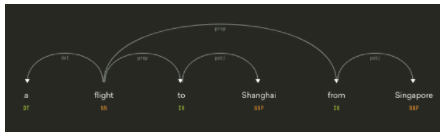

Trong cả hai cụm từ "a flight to shanghai from singapore" và "a flight from singapore to shanghai", từ 'to' là cha của từ 'shanghai' và 'from' là cha của từ 'singapore'. Chúng ta có thể tham chiếu các token trong dữ liệu spacy với các chỉ số của chúng. Đầu tiên, chúng ta gán các token có chỉ số 3 và 5 cho tên 'shanghai' và 'singapore'.

In [ ]:
doc = nlp('a flight to Shanghai from Singapore')
shanghai, singapore = doc[3], doc[5]

Sau đó, chúng ta có thể truy cập vào các thành phần cha của mỗi token thông qua thuộc tính ancestors, thuộc tính này trả về một đối tượng iterator cho các thành phần cha của token trong cây phân tích cú pháp.

In [ ]:
print(list(shanghai.ancestors))

In [ ]:
list(singapore.ancestors)

**Ví dụ về mua hàng**

Tương tự như vậy trong một ví dụ về mua sắm, chúng ta có thể nhận được một tin nhắn "let's see that jacket in red and some blue jeans".


In [ ]:
doc = nlp("let's see that jacket in red and some blue jeans")

Điều quan trọng không chỉ là trích xuất màu sắc mà còn phải biết chúng thuộc về những món đồ nào. Chúng ta có thể gán các màu này như sau.

In [ ]:
items = [doc[4], doc[10]]
colors =[doc[6], doc[9]]
items
colors

Đối với mỗi màu mà chúng ta duyệt qua các thành phần cha, chúng ta kiểm tra xem có gặp một phần tử hay không bằng câu lệnh if token in items. Phần tử cha đầu tiên là phần tử chứa màu sắc đó.

In [ ]:
for color in colors:
   for tok in color.ancestors:
      if tok in items:
         print ("color {} belongs to item {}".format(color, tok))
         break

####Sử dụng trình nhận dạng thực thể của spaCy

In [ ]:
include_entities = ['DATE', 'ORG', 'PERSON']

# Định nghĩa hàm extract_entities()
def extract_entities(message):
    # Tạo một từ điển để lưu trữ entities
    ents = dict.fromkeys(include_entities)
    # Tạo một tài liệu spacy
    doc = nlp(message)
    for ent in doc.ents:
        if ent.label_ in include_entities:
            # Lưu các thực thể thoả mãn yêu cầu
            ents[ent.label_] = ent.text
    return ents

print(extract_entities('friends called Mary who have worked at Google since 2010'))
print(extract_entities('people who graduated from MIT in 1999'))

####Nhận định vai trò của từ bằng cách sử dụng phân tích cú pháp của spaCy

In [ ]:
from importlib_metadata import entry_points

# Tạo tài liệu spacy
doc = nlp("let's see that jacket in red and some blue jeans")

# Lặp các từ trong cây phân tích cú pháp cho đến khi thực thể của từ thoả mãn điều kiện
def find_parent_item(word):
    # Iterate over the word's ancestors
    for parent in word.ancestors:
        # Check for an "item" entity
        if entry_points(parent) == "item":
            return parent.text
    return None
    
# Đối với tất cả các thực thể "color", hãy tìm từ gốc của các thực thể này
def assign_colors(doc):
    # Lặp trên doc
    for word in doc:
        # Kiểm tra có là loại thực thể "color" không
        # if entry_points(word) == "color":
            # Tìm từ gốc
            item = find_parent_item(word)
            print("item: {0} has color : {0}".format(item, word))

# Assign màu sắc
assign_colors(doc)

###Hiểu rõ ngôn ngữ với NLU


Chúng ta sẽ sử dụng một thư viện có tên là Rasa NLU, hay hiểu biết về ngôn ngữ tự nhiên.

Rasa NLU cung cấp một API mức cao để nhận dạng chủ ý và trích xuất thực thể, đồng thời có một số thành phần hữu ích đã được tích hợp sẵn để xây dựng chatbot.

####**Định dạng dữ liệu Rasa**

Để sử dụng rasa, chúng ta sẽ cung cấp dữ liệu đào tạo trong một tệp JSON. JSON là một định dạng dữ liệu phổ biến mà con người có thể đọc được dựa trên các cặp key và value. Chúng ta nhập hàm load_data và thực hiện gọi hàm này, truyền đường dẫn đến tệp dữ liệu đào tạo làm đối số để tạo đối tượng dữ liệu đào tạo.

In [ ]:
from rasa.shared.nlu.training_data.loading import load_data
training_data = load_data("./training_data.json")
# import json
# print(json.dumps(data.training_examples[22], indent=2))

#III. Building a virtual assistant



##Trợ lý ảo và truy cập dữ liệu

Trong bài học này, chúng ta sẽ tìm hiểu về việc xây dựng các chatbot hoạt động với vai trò là một trợ lý ảo. Các trường hợp sử dụng chatbot phổ biến bao gồm lên lịch cho cuộc họp, đặt chuyến bay và tìm kiếm nhà hàng. Tất cả các nhiệm vụ này đều yêu cầu thông tin về thế giới bên ngoài và để truy cập nó, chúng ta cần tương tác với cơ sở dữ liệu, API hoặc kết hợp cả hai. Trong các bài tập tiếp theo, chúng ta sẽ viết code cho chatbot có thể tương tác với cơ sở dữ liệu SQL, nhưng các bài học cũng có thể áp dụng cho các REST API và các loại cơ sở dữ liệu khác.

####**SQL cơ bản**

Để truy xuất các nhà hàng từ bảng (và từng thuộc tính của chúng), chúng ta sẽ thực hiện truy vấn SELECT * FROM restaurant;.



```
SELECT * FROM restaurants;
```



Nếu chúng ta chỉ muốn lấy tên và xếp hạng, câu truy vấn sẽ là SELECT name, rating FROM restaurants;.



```
SELECT name, rating from restaurants;
```



Trong đó 'name' và 'rating' tương ứng với tên của các cột trong bảng. Ngoài ra, nếu chúng ta muốn tìm kiếm một nhà hàng đắt hơn nằm ở trung tâm thành phố, chúng ta sẽ thực hiện câu truy vấn như sau:



```
SELECT name from restaurants
WHERE area = 'center' AND price = 'high';
```



####SQLite với Python

In [ ]:
import sqlite3

In [ ]:
connection = sqlite3.connect('hotel_data.db')

In [ ]:
c = connection.cursor()

Chúng ta có thể thực hiện các câu truy vấn bằng cách truyền vào một chuỗi ký tự cho phương thức `execute()`.

In [ ]:
# c.execute("SELECT * FROM hotels WHERE area = 'south' and price = 'high'")
c.execute("SELECT *FROM hotel")

In [ ]:
c.fetchall()

####**SQL Injection**




```
#Không nên làm
query = "SELECT name from restaurant where area= '{}'".format(area)
c.execute(query)
```



```
#Nên làm
t=(area,price)
c.execute('SELECT * FROM hotels WHERE area=? and price=?', t)
```
